This code scrapes a reddit comment thread, for comments and initial sub comments. from these comments it creates a dictionary including the words used and how often they are used excluding stopwords which is then transformed into a wordcloud

In [1]:
import urllib.request
import json
import pymongo
from pprint import pprint
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer
import time
import requests
from nltk.corpus import stopwords

In [2]:
url = r'https://www.reddit.com/r/london/comments/71q10h/uber_loses_london_operating_licence_after_ruling/.json?limit=500'
## The url that I will scrape

In [3]:
comments = []
replies =[]  ## creates 2 empty lists
with urllib.request.urlopen(url) as uber:
    content = uber.read()
contentd = json.loads(content)  ##read the json and turn it into a dictionary
for i in contentd[1]['data']['children']:  ## for each post 
    try:
        comments.append(i['data']['body']) ## add the text of the comment to the list comments
        
        if i['data']['replies'] !="": ## if there are replies to this comment
            comments.append(i['data']['replies']['data']['children'][0]['data']['body'])  ## add the body of the reply
    except: 
        pass ## if there is a problem with the body skip and continue
    

In [4]:
clean = []  ## create an empty list
for i in comments: ## for each line in comments add it to the list clean and make adjustments to text
    clean.append(i.lower().strip().replace('\n','').replace('-','').replace('https:','').replace('&','and').replace('"','') \
           .replace('?','').replace('!','').replace(',','').replace('.','').replace(':','').replace(';','').replace(')','') \
           .replace('(','').replace('[','').replace(']','').replace('/',' ').replace('"it\'s"','it\'s').replace('cabs','cab'))

In [5]:
clean 

["london is uber's only profitable city in europe this is a big deal for them",
 'how what on earth are their overheads',
 "ok so afaik this doesn't mean they're gonna be gone by midnight or some shitthey have 21 days to appeal  during which time they can continue to operate  and i *think* that after that they can keep operating until the entire appeal has been resolved  which could be *ages*and to be honest  they'll presumably win the appeal while giving up some major concessions reregulation this seems more like tfl demonstrating it means business especially in the wake of the dodgy sexual assault stuff",
 'yup uber has been described by the mayor of calgary as being the worst people he has had to negotiate with the company pulls a fine line between legal and informal economy they will be allowed to opperate however i imagine the city uses this as a bargaining chip with the proper cab industry too',
 'i hope at the very least uber can demonstrate new policies for dealing with the dem

In [6]:
stop = stopwords.words('english')  ## import stopwrods from nltk.corpus

In [7]:
stop.append('they\'ve')
stop.append('way')
stop.append('well')
stop.append('http')
stop.append('i\'ll')
stop.append('weren\'t')
stop.append('aren\'t')
stop.append('andgt')
stop.append('what\'s')
stop.append('i\'d')
stop.append('they\'re')
stop.append('i\'m')
stop.append('i\'ve')
stop.append('don\'t')
stop.append('it\'s')

In [8]:
stop

['i',
 'me',
 'my',
 'myself',
 'we',
 'our',
 'ours',
 'ourselves',
 'you',
 'your',
 'yours',
 'yourself',
 'yourselves',
 'he',
 'him',
 'his',
 'himself',
 'she',
 'her',
 'hers',
 'herself',
 'it',
 'its',
 'itself',
 'they',
 'them',
 'their',
 'theirs',
 'themselves',
 'what',
 'which',
 'who',
 'whom',
 'this',
 'that',
 'these',
 'those',
 'am',
 'is',
 'are',
 'was',
 'were',
 'be',
 'been',
 'being',
 'have',
 'has',
 'had',
 'having',
 'do',
 'does',
 'did',
 'doing',
 'a',
 'an',
 'the',
 'and',
 'but',
 'if',
 'or',
 'because',
 'as',
 'until',
 'while',
 'of',
 'at',
 'by',
 'for',
 'with',
 'about',
 'against',
 'between',
 'into',
 'through',
 'during',
 'before',
 'after',
 'above',
 'below',
 'to',
 'from',
 'up',
 'down',
 'in',
 'out',
 'on',
 'off',
 'over',
 'under',
 'again',
 'further',
 'then',
 'once',
 'here',
 'there',
 'when',
 'where',
 'why',
 'how',
 'all',
 'any',
 'both',
 'each',
 'few',
 'more',
 'most',
 'other',
 'some',
 'such',
 'no',
 'nor',
 '

In [9]:
wordcount = {}  ## cretae dictionary called wordcount

for line in clean: #for each line 
    words = line.split() #split into words
    for word in words: # for each word in list words
        
        if word not in stop:  ## if the word is not in stopwords list
            
            wordcount[word] = wordcount.get(word, 0)+1 #add to dictionary, and add 1 to count value

In [15]:
from wordcloud import WordCloud
import numpy as np
from PIL import Image
from os import path 
##imports for wordcloud

In [18]:
taxi_mask = np.array(Image.open(r'C:\data\uber.png'))  ## adds mask for the wordcloud of uber logo

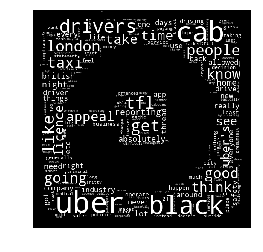

In [19]:
def white_func(word, font_size, position, orientation, random_state=None, **kwargs):
    return "hsl(0, 100%, 100%)"   ## defines the colour white for words
    
    

wordcloud = WordCloud(background_color='black', color_func=white_func, mask=taxi_mask)  ##formats the wordcloud 
wordcloud.generate_from_frequencies(wordcount) ##generates the size based on values of dictionary
plt.imshow(wordcloud)
plt.axis("off")
plt.figure(frameon=True)
plt.show()
wordcloud.to_file("uberclouds.png")  ## add to file